In [100]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df=pd.read_csv("data.csv")

In [102]:
df=df[df["TotalCharges"]!=" "]
df.drop("customerID",axis="columns",inplace=True)

In [103]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [104]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

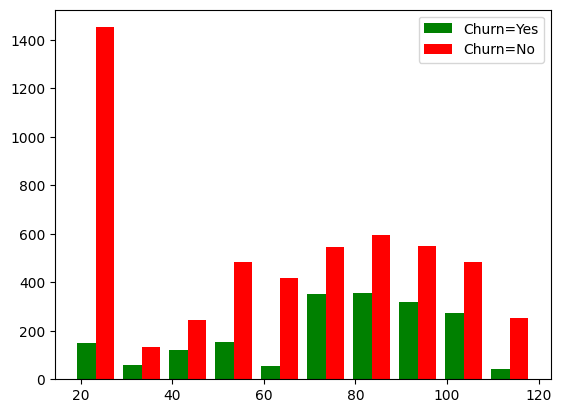

In [105]:
df_yes=df[df.Churn=="Yes"]
df_no=df[df.Churn=="No"]
# plt.hist([df_yes.tenure,df_no.tenure],color=["green","red"],label=["Churn=Yes","Churn=No"])
# plt.legend()
plt.hist([df_yes.MonthlyCharges,df_no.MonthlyCharges],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.legend()


In [106]:
def printUnique(df):
  for column in df:
    print("Column: ",column,"\t Values:",df[column].unique())

In [107]:
df.replace("No phone service","No",inplace=True)
df.replace("No internet service","No",inplace=True)

In [108]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  df[col].replace({"Yes":1,"No":0},inplace=True)
df["gender"].replace({"Male":1,"Female":0},inplace=True)

In [109]:
df1=pd.get_dummies(data=df,columns=["Contract","PaymentMethod","InternetService"])

In [110]:
from sklearn.preprocessing import MinMaxScaler
cols=["tenure","MonthlyCharges","TotalCharges"]
scaler=MinMaxScaler()
df1[cols]=scaler.fit_transform(df1[cols])

In [111]:
X=df1.drop("Churn",axis="columns")
Y=df1.Churn

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [113]:
model=keras.Sequential([
    keras.layers.Dense(26,activation="relu",input_shape=(26,)),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [114]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 2s 2ms/step - loss: 0.5437 - accuracy: 0.7036
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8005
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8041
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8073
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8089
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8116
Epoch 7/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8100
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8121
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.8146
Epoch 10/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8117

In [115]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7704


[0.4814576208591461, 0.7704335451126099]

In [116]:
y_pred=model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [117]:
y_prednew=[]
for i in y_pred:
  if(i[0]>0.5):
    y_prednew.append(1)
  else:
    y_prednew.append(0)

In [118]:
from sklearn.metrics import confusion_matrix,classification_report

In [119]:
print(classification_report(y_test,y_prednew))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       999
           1       0.65      0.46      0.54       408

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

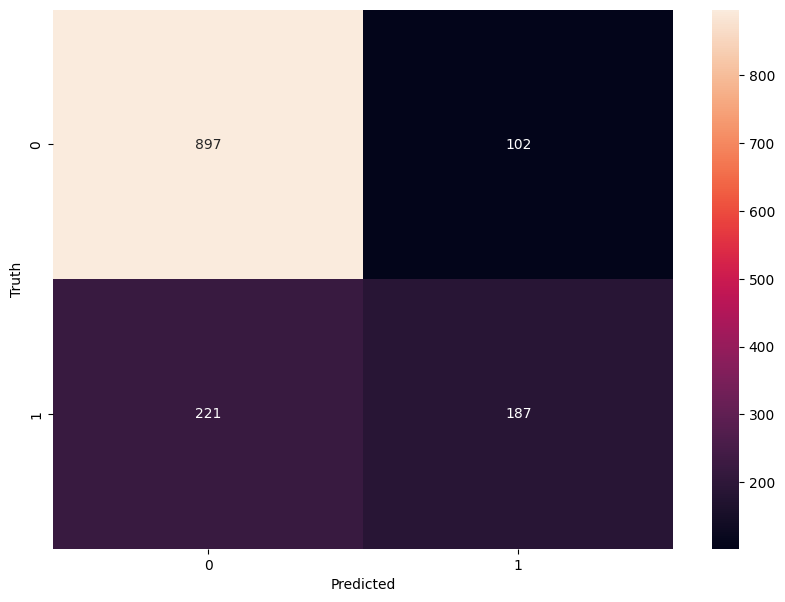

In [120]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prednew)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')